# Project -7 Churn data Neural Network

## Install tensorflow

In [1]:
!pip install tensorflow

ERROR: phik 0.11.2 has requirement scipy>=1.5.2, but you'll have scipy 1.5.0 which is incompatible.



  Created wheel for clang: filename=clang-5.0-py3-none-any.whl size=30707 sha256=87b234d0f85e03b00f5817f54d65e6b40b7fbe00067c3e397bdf14cb5d9dd8e6
  Stored in directory: c:\users\p00137247\appdata\local\pip\cache\wheels\f1\60\77\22b9b5887bd47801796a856f47650d9789c74dc3161a26d608
  Created wheel for wrapt: filename=wrapt-1.12.1-py3-none-any.whl size=19558 sha256=218cca6a51c8ce81930d9d78a51612faba0adcb233dd01ec823522e2ce217d71
  Stored in directory: c:\users\p00137247\appdata\local\pip\cache\wheels\5f\fd\9e\b6cf5890494cb8ef0b5eaff72e5d55a70fb56316007d6dfe73
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4835 sha256=7813a61b56a6e559852fb27e1e621e7925f99f76836352266d9718edf889b6ef
  Stored in directory: c:\users\p00137247\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built clang wrapt termcolor
  Attempting uninstall: numpy
    Found existing installation: numpy 1.18.5
    Uninstalling numpy-1.18.5:
  

## Let us import all the libraries

In [3]:

#importing tensorflow
import tensorflow as tf
print(tf.__version__)
from sklearn.preprocessing import LabelEncoder

2.6.0


In [34]:
import pandas as pd
import numpy as np
import matplotlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.decomposition import PCA
import seaborn as sns
import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
#from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [3]:
opt = tf.keras.optimizers.Adam(learning_rate=0.1)

## 2.Data Exploration

In [5]:
#Loading dataset
data=pd.read_csv("bank.csv")

In [6]:
data.shape

(10000, 14)

### We have 14 columns and 10000 rows

In [127]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [51]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9953,9954,15655952,Burke,550,France,Male,47,2,0.00,2,1,1,97057.28,0
3850,3851,15775293,Stephenson,680,France,Male,34,3,143292.95,1,1,0,66526.01,0
4962,4963,15665088,Gordon,531,France,Female,42,2,0.00,2,0,1,90537.47,0
3886,3887,15720941,Tien,710,Germany,Male,34,8,147833.30,2,0,1,1561.58,0
5437,5438,15733476,Gonzalez,543,Germany,Male,30,6,73481.05,1,1,1,176692.65,0
8517,8518,15671800,Robinson,688,France,Male,20,8,137624.40,2,1,1,197582.79,0
2041,2042,15709846,Yeh,840,France,Female,39,1,94968.97,1,1,0,84487.62,0
1989,1990,15622454,Zaitsev,695,Spain,Male,28,0,96020.86,1,1,1,57992.49,0
1933,1934,15815560,Bogle,666,Germany,Male,74,7,105102.50,1,1,1,46172.47,0
9984,9985,15696175,Echezonachukwu,602,Germany,Male,35,7,90602.42,2,1,1,51695.41,0


### Let us check missing value

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### We have no null or missing values

In [10]:
#Number of distinct categories or classes i.e.,exited or still a customer
data['Exited'].nunique()

2

In [11]:
#Number of distinct categories or classes i.e., male and female
data['Gender'].nunique()

2

In [12]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
data['Geography'].nunique()

3

In [13]:
#checking the percentage of each class in the dataset
(data.Exited.value_counts())/(data.Exited.count())

0    0.7963
1    0.2037
Name: Exited, dtype: float64

### We have about79.63 % who didn't exit while 20.37% have exited

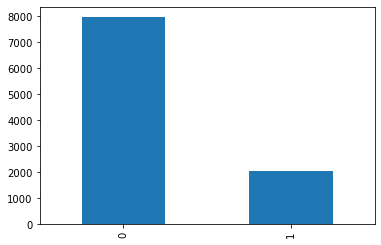

In [16]:
#visual representation of instances per Exited
data.Exited.value_counts().plot.bar()

In [52]:

#checking the percentage of each class in the dataset
(data.Gender.value_counts())/(data.Gender.count())

Male      0.5457
Female    0.4543
Name: Gender, dtype: float64

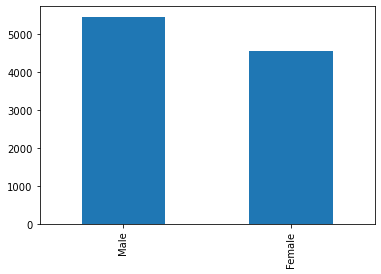

In [53]:
#visual representation of instances by Gender
data.Gender.value_counts().plot.bar()

### We have about 54.47 % who are male customers and 45.43% customers are female

In [54]:
#checking the percentage of each class in the dataset
(data.Geography.value_counts())/(data.Geography.count())

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

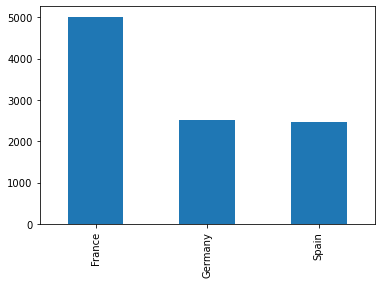

In [55]:
#visual representation of instances by Gender
data.Geography.value_counts().plot.bar()

### We have about 50 % of customers from france and 25% from Germany and other 25% from Spain

In [63]:
# Let us use the function to plot boxplot and histogram of non categorical data
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='skyblue') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'Orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

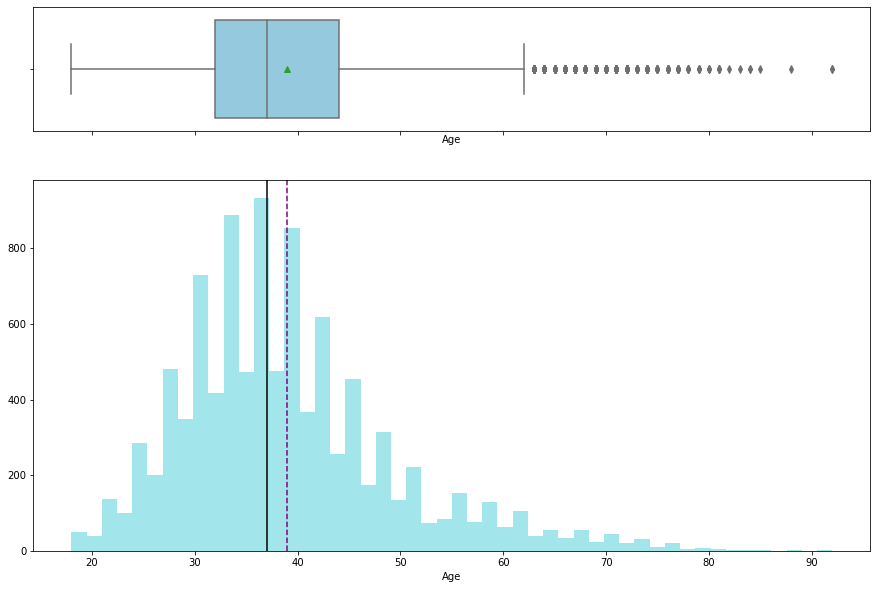

In [64]:
histogram_boxplot(data.Age)

### Age is fairly normal and slightly right skewed. Age mean and median is close to 40 years

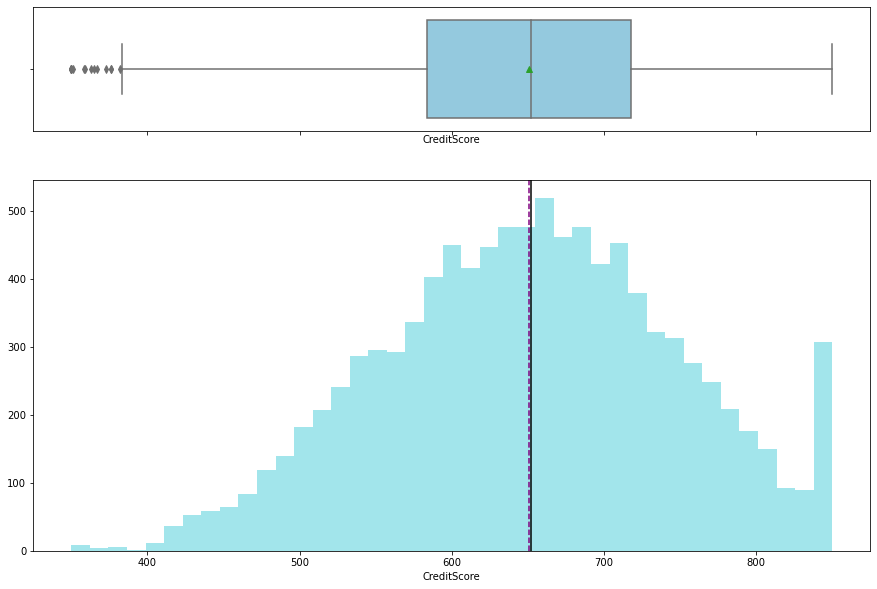

In [65]:
histogram_boxplot(data.CreditScore)

### Credit Score is fairly normal and slightly left skewed. CreditScore mean and median is close to 650

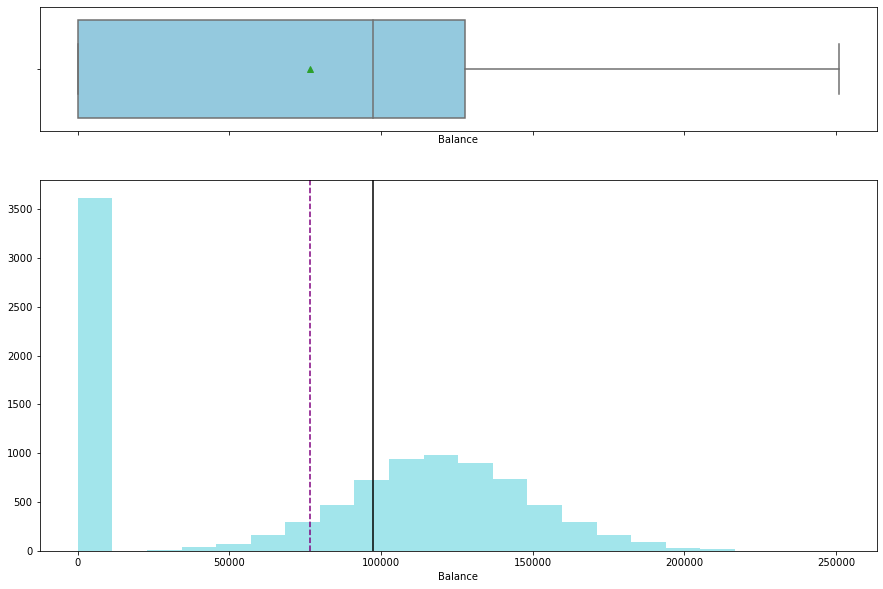

In [75]:
histogram_boxplot(data.Balance)

### If we take of customers with Balnce=0 then the graph looks normal else it is hevily right skewed

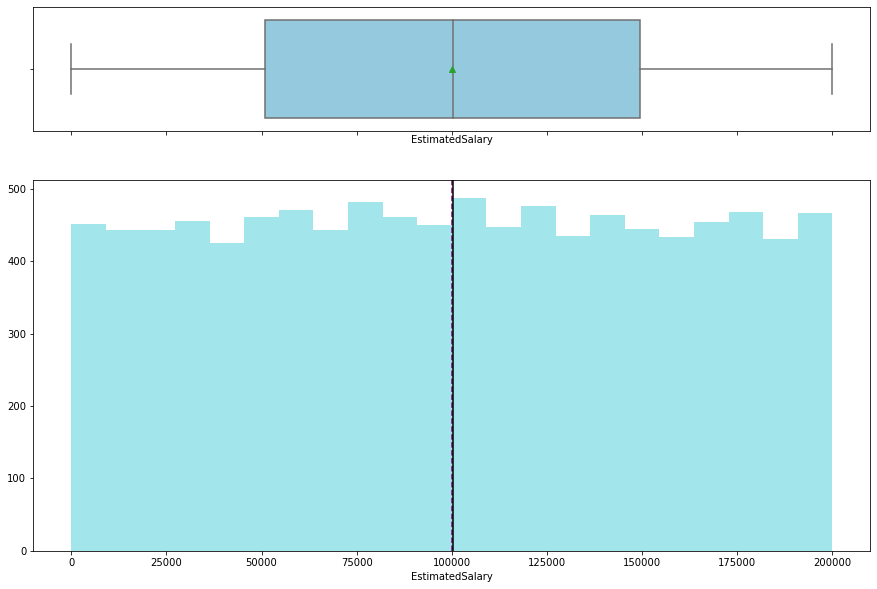

In [77]:
histogram_boxplot(data.EstimatedSalary)

### EstimatedSalary is fairly normal. Mean and median is close to 100000

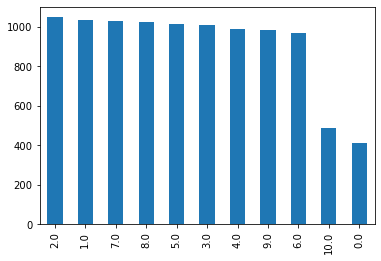

In [74]:

data.Tenure.value_counts().plot.bar()

In [128]:
#checking the percentage of each class in the dataset
(data.Tenure.value_counts())/(data.Tenure.count())

2.0     0.1048
1.0     0.1035
7.0     0.1028
8.0     0.1025
5.0     0.1012
3.0     0.1009
4.0     0.0989
9.0     0.0984
6.0     0.0967
10.0    0.0490
0.0     0.0413
Name: Tenure, dtype: float64

### various classes of tenure other than 0 and 10 have roughly 10% else they are close to 4%

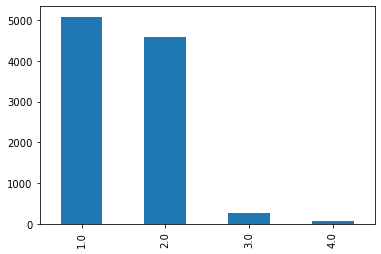

In [73]:

data.NumOfProducts.value_counts().plot.bar()

In [131]:
#checking the percentage of each class in the dataset
(data.NumOfProducts.value_counts())/(data.NumOfProducts.count())

1.0    0.5084
2.0    0.4590
3.0    0.0266
4.0    0.0060
Name: NumOfProducts, dtype: float64

### More than 95% customers have either 1 or 2 products. 2 or 3% have more products

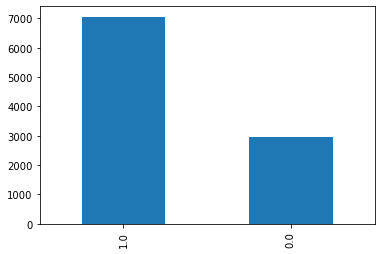

In [72]:

data.HasCrCard.value_counts().plot.bar()

In [130]:
#checking the percentage of each class in the dataset
(data.HasCrCard.value_counts())/(data.HasCrCard.count())

1.0    0.7055
0.0    0.2945
Name: HasCrCard, dtype: float64

### Roughly 70.5% of customers have Credit card and 29.5% don't

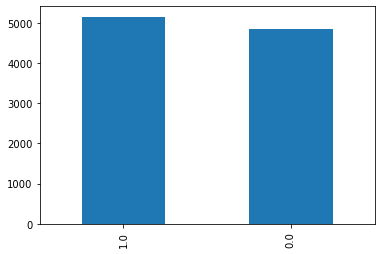

In [71]:

data.IsActiveMember.value_counts().plot.bar()

In [129]:
#checking the percentage of each class in the dataset
(data.IsActiveMember.value_counts())/(data.IsActiveMember.count())

1.0    0.5151
0.0    0.4849
Name: IsActiveMember, dtype: float64

### Roughly 51.5% of customers are active and 48.5% customers are inactive

In [80]:
### Function to plot stacked bar charts for categorical columns with hue across dependent variable Personal Loan
def stacked_plot(x):
    sns.set()
    ## crosstab 
    tab1 = pd.crosstab(x,data['Exited'],margins=True)
    print(tab1)
    print('-'*120)
    ## visualising the cross tab
    tab = pd.crosstab(x,data['Exited'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(17,7))
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 859.5+ KB


Exited      0.0   1.0    All
Geography                   
France     4204   810   5014
Germany    1695   814   2509
Spain      2064   413   2477
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


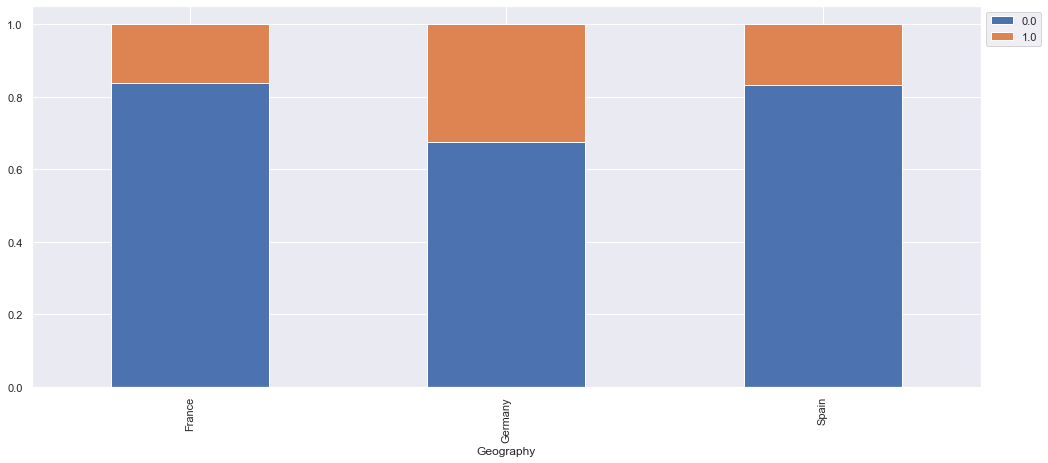

In [83]:
stacked_plot(data['Geography'])

### We have slightly more percentage of customers leaving bank from germany

Exited   0.0   1.0    All
Gender                   
Female  3404  1139   4543
Male    4559   898   5457
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


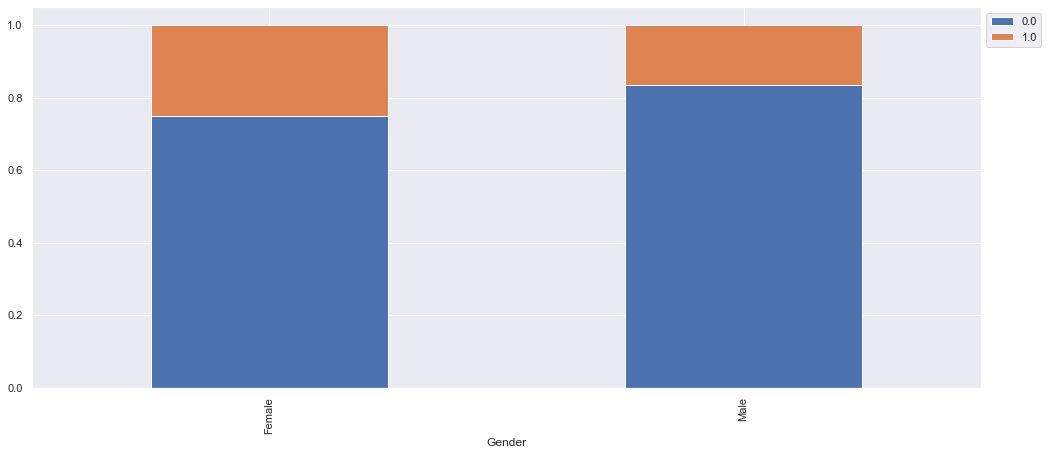

In [84]:
stacked_plot(data['Gender'])

### We have more percentage of female customers leaving bank compared to Male

Exited   0.0   1.0    All
Tenure                   
0.0      318    95    413
1.0      803   232   1035
2.0      847   201   1048
3.0      796   213   1009
4.0      786   203    989
5.0      803   209   1012
6.0      771   196    967
7.0      851   177   1028
8.0      828   197   1025
9.0      771   213    984
10.0     389   101    490
All     7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


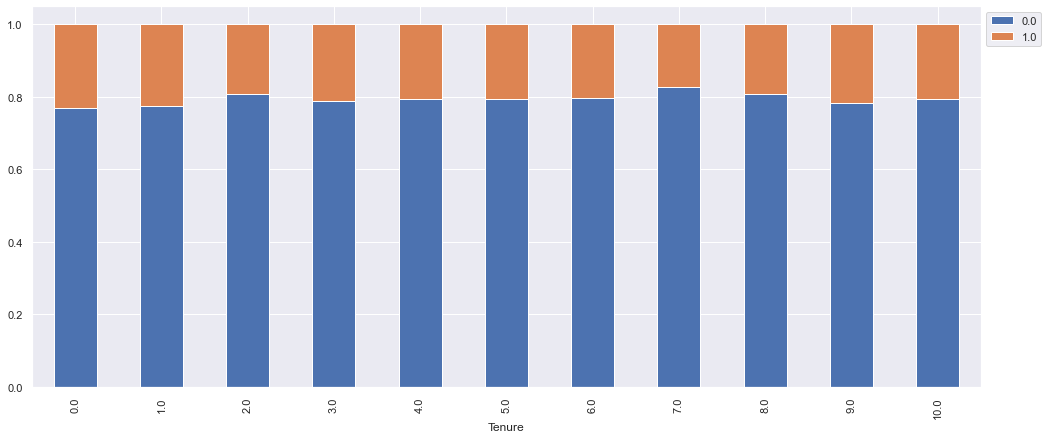

In [86]:
stacked_plot(data['Tenure'])

### We have slightly more percentage of customers leaving bank if they have 0 or 1 tenure

Exited          0.0   1.0    All
NumOfProducts                   
1.0            3675  1409   5084
2.0            4242   348   4590
3.0              46   220    266
4.0               0    60     60
All            7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


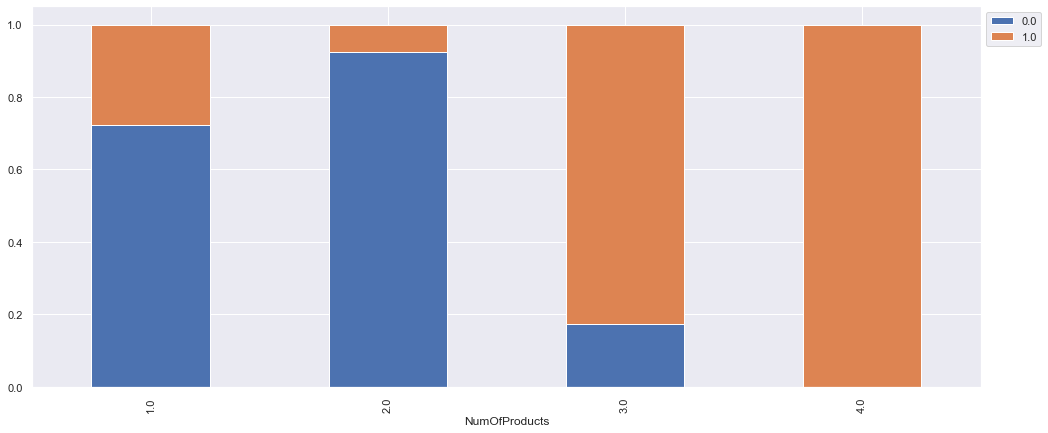

In [87]:
stacked_plot(data['NumOfProducts'])

### Customers with 4 products definitely left the bank, and with 3 products majority left the bank. Customers with 2 products hardly exited

Exited      0.0   1.0    All
HasCrCard                   
0.0        2332   613   2945
1.0        5631  1424   7055
All        7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


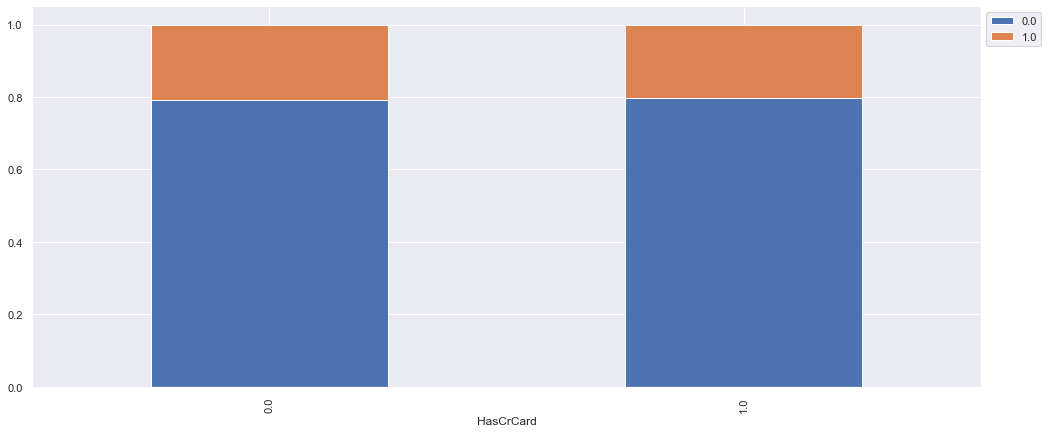

In [88]:
stacked_plot(data['HasCrCard'])

### We have slightly more percentage of customers leaving bank if they didn't have credit card

Exited           0.0   1.0    All
IsActiveMember                   
0.0             3547  1302   4849
1.0             4416   735   5151
All             7963  2037  10000
------------------------------------------------------------------------------------------------------------------------


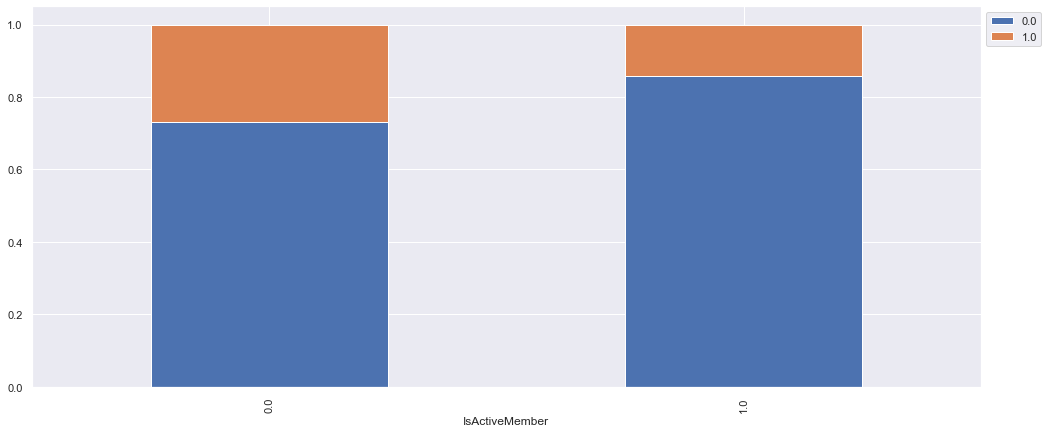

In [89]:
stacked_plot(data['IsActiveMember'])

### We have more percentage of customers leaving bank if they were inactive

In [57]:
#Let us convert all the variables to float type
data["CreditScore"] = data["CreditScore"].astype("float64") 
data["Age"] = data["Age"].astype("float64")
data["Tenure"] = data["Tenure"].astype("float64") 
data["NumOfProducts"] = data["NumOfProducts"].astype("float64") 
data["HasCrCard"] = data["HasCrCard"].astype("float64")
data["IsActiveMember"] = data["IsActiveMember"].astype("float64") 
data["Exited"] = data["Exited"].astype("float64")

### Drop all unnnecessary features

In [56]:
# Let us drop RowNumber, CustomerId and Surname as we don't have any control over them to predict if customer can exit based of them
data = data.drop(['RowNumber'], axis=1)
data = data.drop(['CustomerId'], axis=1)
data = data.drop(['Surname'], axis=1)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  float64
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  float64
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  float64
 7   HasCrCard        10000 non-null  float64
 8   IsActiveMember   10000 non-null  float64
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  float64
dtypes: float64(9), object(2)
memory usage: 859.5+ KB


### Let us label and create dummy variables for features of Object type

In [59]:
X = data.drop(labels=['Exited'], axis = 1)
y = data['Exited']

In [60]:
label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [61]:
label = LabelEncoder()
X['Gender'] = label.fit_transform(X['Gender'])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619.0,0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,2,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,2,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [92]:
X=pd.get_dummies(X, drop_first=True, columns=['Geography']) # Creating dummy variable for Geography

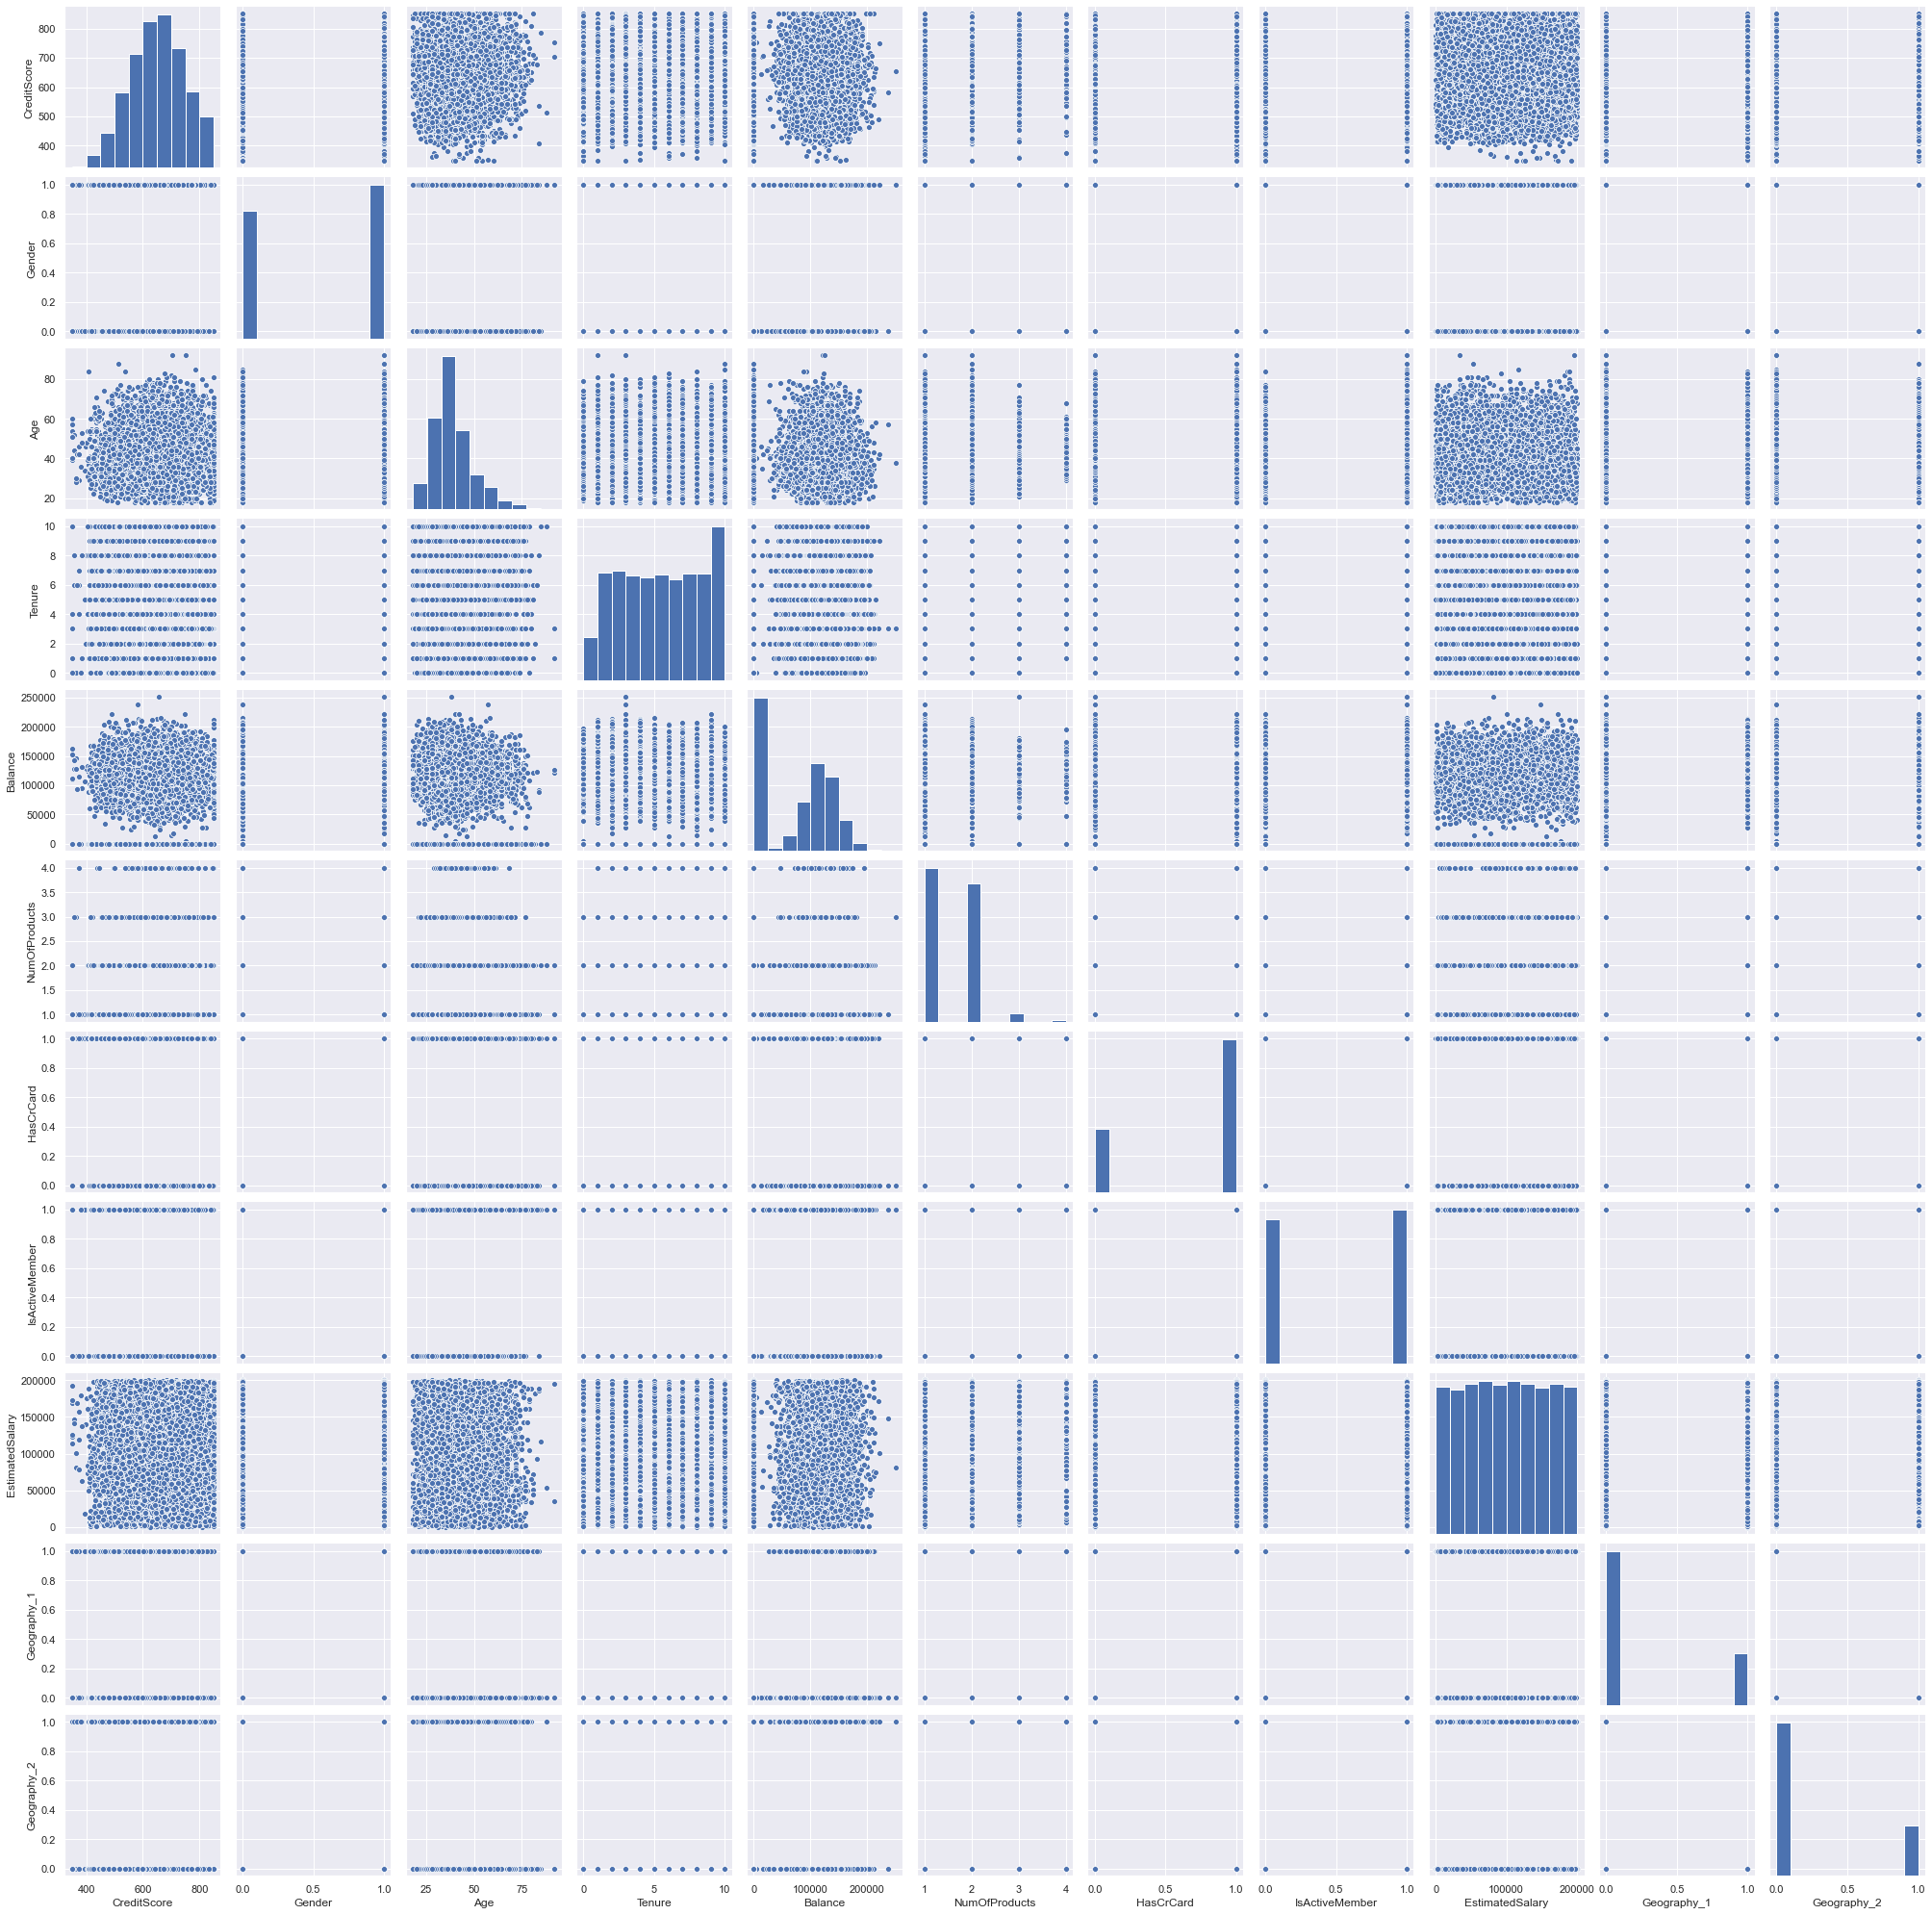

In [93]:
import seaborn as sns

sns.pairplot(data=X)

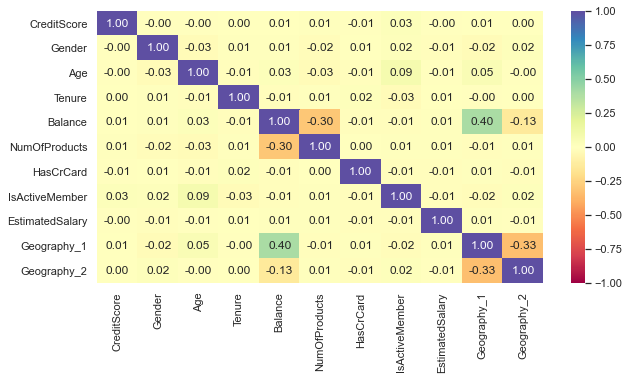

In [94]:
plt.figure(figsize=(10,5))
sns.heatmap(X.corr(),annot=True,vmin=-1,vmax=1,fmt='.2f',cmap='Spectral') # Heatmap of correlation matrix of various variables
plt.show()

### When we look at Pair plot and correllation matrix hardly any correlation. the highest we have is 0.4 in Geography_1 and Balance

In [95]:
X.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619.0,0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,0,0
1,608.0,0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0,1
2,502.0,0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,0,0
3,699.0,0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0,0
4,850.0,0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0,1


In [97]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Exited, dtype: float64

## Feature Scaling and test train split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, stratify=Y)

In [99]:
# scaling the dataset before modelling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [100]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 11)
(2000, 11)
(8000,)
(2000,)


#### X-train has 8000 rows and 11 columns
#### X_test has 2000 rows and 11 columns
#### Y_train has 8000 entries
#### Y_test has 2000 entries

# Random Forest

In [133]:
from sklearn.ensemble import RandomForestClassifier

In [134]:
random_forest = RandomForestClassifier(n_estimators=100)

In [135]:
# Pandas Series.ravel() function returns the flattened underlying data as an ndarray.
random_forest.fit(X_train,y_train.values.ravel())    # np.ravel() Return a contiguous flattened array

RandomForestClassifier()

In [136]:
y_pred = random_forest.predict(X_test)

In [137]:
random_forest.score(X_test,y_test)

0.864

In [138]:
confusion_matrix(y_test, y_pred)

array([[1539,   54],
       [ 218,  189]], dtype=int64)

In [139]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

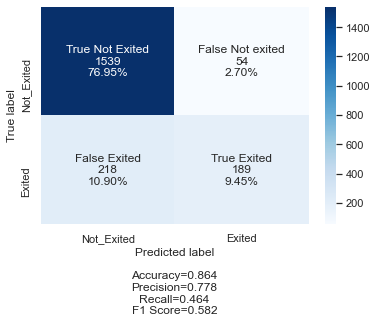

In [141]:
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Not Exited','False Not exited','False Exited','True Exited']
categories = [ 'Not_Exited','Exited']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

## The Random forest gave us exremely good Accuracy and Precision with low recall. We shall also build neural network and see how it effects

### Model evaluation criterion
#### Model can make wrong predictions as:
#### Predicting a Exited when not exited
#### Predicting as not exited  when actually exited
##### Which case is more important?
##### Predicting false not exited might be more or reducing that would be more important as company wants the best model that can successfully predict if customer exits
###### How to reduce this type 1 error?
###### Company would want increase accuracy to be maximized, greater the accuracy higher the chances of minimizing false Positive. Hence, the focus should be on increasing Accuracy or minimizing the false Positiveor in other words identifying the True Positive(i.e. Class 1) so that the Company can identify the fraud transaction

## ANN Implimentation

#### We will use a simple NN made of 3 fully-connected layers with ReLu activation. The NN takes a vector of length 11 as input. This represents the information related to each transactions, ie each line with 11 columns from the dataset. For each transaction, the final layer will output a probability distribution (sigmoid activation function) and classify either exited or not exited in first 6 month.
#### a dropout step is included to prevent overfitting.
### Dropout

#### Dropout is a regularization technique for neural network models proposed by Srivastava, et al. in their 2014 paper Dropout: A Simple Way to Prevent Neural Networks from Overfitting. Dropout is a technique where randomly selected neurons are ignored during training. They are “dropped-out” randomly

In [142]:
#initialize the model
model = Sequential()

In [143]:
model.add(Dense(X.shape[1], activation='relu', input_dim = X.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

#### Model compile [optimizers and loss functions]¶
##### Keras model should be "compiled" prior to training

##### Types of loss (function) and optimizer should be designated

In [144]:
# Create optimizer with default learning rate
# Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Let's Print summary model

In [145]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               1536      
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 1,797
Trainable params: 1,797
Non-trainable params: 0
_________________________________________________________________


### Training [Forward pass and Backpropagation]
#### Training the model

In [146]:
#fitting the model
history=model.fit(X_train,y_train,batch_size=10,epochs=10,validation_split = 0.2,verbose=1)

Epoch 1/10
640/640 [==============================] - 1s 2ms/step - loss: 0.4859 - accuracy: 0.7850 - val_loss: 0.4088 - val_accuracy: 0.8325
Epoch 2/10
640/640 [==============================] - 1s 1ms/step - loss: 0.4035 - accuracy: 0.8369 - val_loss: 0.3653 - val_accuracy: 0.8494
Epoch 3/10
640/640 [==============================] - 1s 1ms/step - loss: 0.3731 - accuracy: 0.8480 - val_loss: 0.3521 - val_accuracy: 0.8581
Epoch 4/10
640/640 [==============================] - 1s 1ms/step - loss: 0.3639 - accuracy: 0.8542 - val_loss: 0.3480 - val_accuracy: 0.8587
Epoch 5/10
640/640 [==============================] - 1s 2ms/step - loss: 0.3596 - accuracy: 0.8566 - val_loss: 0.3504 - val_accuracy: 0.8562
Epoch 6/10
640/640 [==============================] - 1s 1ms/step - loss: 0.3604 - accuracy: 0.8536 - val_loss: 0.3466 - val_accuracy: 0.8587
Epoch 7/10
640/640 [==============================] - 1s 1ms/step - loss: 0.3470 - accuracy: 0.8597 - val_loss: 0.3430 - val_accuracy: 0.8587
Epoch 

### Plotting the train and test loss

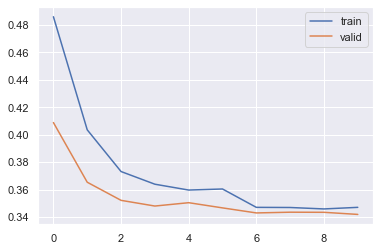

In [147]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

### Evaluation
#### Keras model can be evaluated with evaluate() function

#### Evaluation results are contained in a lis

In [148]:
score = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3535 - accuracy: 0.8595


### Model had an accuracy of 85.95% fairly simiar to random forest

In [149]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.859
Loss: 0.353


In [150]:
m=np.argmax(model.predict(X_test), axis=-1)

In [151]:
m

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [152]:
y_pred= m

In [153]:
y_test

1344    1.0
8167    0.0
4747    0.0
5004    1.0
3124    1.0
       ... 
9107    0.0
8249    0.0
8337    0.0
6279    1.0
412     0.0
Name: Exited, Length: 2000, dtype: float64

In [154]:
confusion_matrix(y_test, y_pred)

array([[1593,    0],
       [ 407,    0]], dtype=int64)

In [155]:
accuracy_score(y_test, y_pred)          

0.7965

### Let's Build another Model

In [163]:
from tensorflow.keras.optimizers import Adam

In [175]:
#Training Multi-layer perceptron with 2 hidden layers

#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()
#Initializing the weights uisng hue_normal 
Model2.add(Dense(128, input_shape=(X.shape[1], ), kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(128, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dropout(0.5))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=10, epochs=10, callbacks=[es], shuffle=True, verbose=1)

Epoch 1/10
640/640 [==============================] - 3s 3ms/step - loss: 0.6029 - accuracy: 0.7534 - val_loss: 0.3994 - val_accuracy: 0.8363
Epoch 2/10
640/640 [==============================] - 2s 3ms/step - loss: 0.4602 - accuracy: 0.8031 - val_loss: 0.3937 - val_accuracy: 0.8438
Epoch 3/10
640/640 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8173 - val_loss: 0.3774 - val_accuracy: 0.8481
Epoch 4/10
640/640 [==============================] - 2s 3ms/step - loss: 0.4152 - accuracy: 0.8288 - val_loss: 0.3777 - val_accuracy: 0.8481
Epoch 5/10
640/640 [==============================] - 2s 3ms/step - loss: 0.4037 - accuracy: 0.8327 - val_loss: 0.3599 - val_accuracy: 0.8506
Epoch 6/10
640/640 [==============================] - 2s 3ms/step - loss: 0.3973 - accuracy: 0.8341 - val_loss: 0.3706 - val_accuracy: 0.8544
Epoch 7/10
640/640 [==============================] - 2s 3ms/step - loss: 0.3864 - accuracy: 0.8417 - val_loss: 0.3534 - val_accuracy: 0.8537
Epoch 

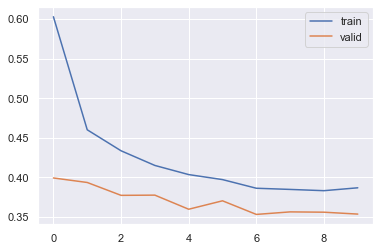

In [176]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [180]:
score = Model2.evaluate(X_test, y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3617 - accuracy: 0.8505


In [181]:
loss, acc = Model2.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.3f'  % acc)
print('Loss: %.3f' % loss)

Accuracy: 0.850
Loss: 0.362


### Conclusion:

#### As you can  There is still lot of scope of improvements as follows:

#### 1) Threshold can be tuned to get the optimal value

#### 2) Resampling techniques can be applied to balanced the data and then train the model

#### 3) Hyperparameter tuning can be applied to tune the different Hyperparameters

##### We can select the Model1 as our final model based on the above analysis as it has slightly higher accuracy

### Insights for Company
#### Company can put limit on number of products to 2 till figuring out why customers with 3 or 4 products customer exit
#### Company can have special offers to retain customers beyond 6 months.
#### Company can give better credit card options as people with credit card exit less
#### Bank can fix opening minimum balance as 0 Balance tend to exit
#### Bank can do survey to get opinion before customers exit or  ask and implement what other compitators are doing better. etc 